In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#Load IMDB dataset

max_features = 2000
maxlen = 200

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
#input length

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
#LSTM model
model = keras.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
#Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
#Train model
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8862 - loss: 0.2761 - val_accuracy: 0.8630 - val_loss: 0.3266
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8871 - loss: 0.2709 - val_accuracy: 0.8710 - val_loss: 0.3203
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8978 - loss: 0.2504 - val_accuracy: 0.8698 - val_loss: 0.3170


In [10]:
#Evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8652 - loss: 0.3154
Test loss: 0.31147411465644836
Test accuracy: 0.8670399785041809


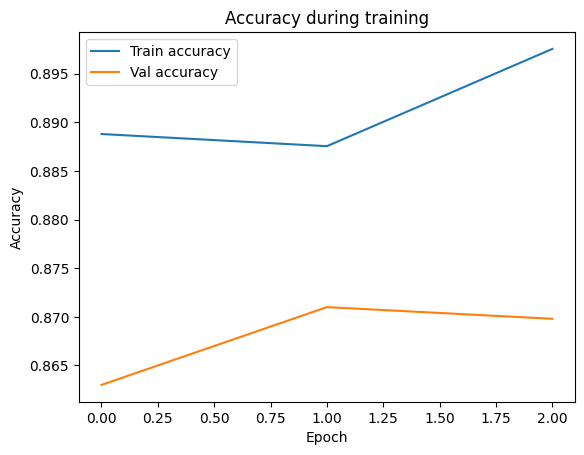

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy during training')
plt.show()